

# Project: Wrangling and Analyzing @WeRateDogs


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>    
<li><a href="#gather">Gathering Data</a></li>        
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#visual">Analyzing and Visualizing Data</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The purpose of this project is to practice the skills of Data Wrangling which I learned from Udacity's Data Analysis Nanodegree program. The dataset which we are working on is the tweet archive of **@dog_rates**, also known as WeRateDogs. 
This Twitter account rates dogs with humorous commentary, where the rating denominator is usually 10. However, the numerators are usually greater than 10. Some interesting visualizations will also be made at the end of this project.
>

## The Data We Have

- Enhanced Twitter Archive
- Additional Data via the Twitter API
- Image Predictions File




In [1]:
# Importing all the relevant packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import tweepy

<a id='gather'></a>
## Gathering Data




1) **Gathering Tweet Archive Files [Loading the twitter-archive-enhanced.csv into a DataFrame]**

In [14]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2) **Gather Tweet Image Prediction Pictures [Downloading the tweet image predictions from Udacity's servers programatically]**

In [4]:
# To download the file programatically 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open("image-predictions.tsv", mode = "wb") as file: # image-predictions is the name of file we are giving, we can change
    file.write(response.content)

In [5]:
# Since its a tab-separated file ['\t']
image_df = pd.read_csv('image-predictions.tsv', sep='\t')
image_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [6]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3) **Gather data from Twitter API [Loading Favorite count and retweet count from Twitter]**

In [7]:
from timeit import default_timer as timer
from tweepy import OAuthHandler

consumer_key ='xxxx'
consumer_secret ='xxxx'
access_token ='xxxx'
access_secret = 'xxxx'

In [8]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
tweet_ids = df.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()

# Save each tweet's as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [10]:
# Reading a text file
tweet_df = pd.read_json('tweet_json.txt', lines = True)
tweet_df.tail(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
2352,NaN,NaN,2015-11-15 23:05:30,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",132,False,This is a western brown Mitsubishi terrier. Up...,NaN,...,0.0,NaN,NaN,NaN,48,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2353,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2535,False,Here we have a Japanese Irish Setter. Lost eye...,NaN,...,0.0,NaN,NaN,NaN,532,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


<a id='assess'></a>
## Assessing Data

    
    
    


    


**Tweet Archive Dataframe Analysis**

In [20]:
# Counting all null values
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [21]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
# Taking a look at 5 random samples
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1556,688828561667567616,NaN,NaN,2016-01-17 21:01:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Brad. His car probably has a spoi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688828561...,9,10,Brad,None,None,None,None
1493,692752401762250755,NaN,NaN,2016-01-28 16:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Hello yes could I get one pupper to go please...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/692752401...,13,10,None,None,None,pupper,None
1876,675111688094527488,NaN,NaN,2015-12-11 00:35:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oliver. He thought what was insid...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675111688...,8,10,Oliver,None,None,None,None
1157,724405726123311104,NaN,NaN,2016-04-25 01:12:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ashleigh. She's having Coachella withd...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724405726...,10,10,Ashleigh,None,None,pupper,None
2016,672169685991993344,NaN,NaN,2015-12-02 21:45:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bradley. That is his sandwich. He carr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672169685...,10,10,Bradley,None,None,None,None


In [23]:
# Checking the duplicates entries
twitter_archive.duplicated().any()

False

In [27]:
# Taking a look at all the names of dogs
twitter_archive['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
Sadie          8
the            8
Buddy          7
an             7
Toby           7
Bailey         7
Daisy          7
Leo            6
Bella          6
Jack           6
Oscar          6
Koda           6
Rusty          6
Stanley        6
Jax            6
Milo           6
Dave           6
Scout          6
Sunny          5
            ... 
Ridley         1
Kloey          1
Kallie         1
Clyde          1
Emma           1
Pancake        1
Bradlay        1
Bode           1
Rupert         1
Tycho          1
Bonaparte      1
Vinnie         1
Lorelei        1
Jordy          1
Dobby          1
Tyrus          1
Butters        1
Terrenth       1
Ralf           1
Dixie          1
Ronduh         1
Gunner         1
Zara           1
Lupe           1
Mimosa         1
Samsom         1
Molly          1
Beebop        

**1. Timestamp and retweeted_status_timestamp is in object format (incorrect datatype should be datetime)**
   
**2. The source column has HTML tags surrounding the text**

**3. There is missing data in these columns: 
in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls**

**4. The tweet_id is in int format (incorrect datatype should be string)**

**5. Some names of dogs are invalid like 'None', 'a', 'an', 'the' etc**

**6. The numerator and denominator columns do not show a rating_ratio (so we will make one)**

**7. The Dog stage is in 4 columns, doggo, floofer, pupper, puppo (so we will add all of them together into a new column).**



** **

**Tweet Image Dataframe Analysis**

In [31]:
# Randomly looking at the tweet images data
image_df.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
458,674788554665512960,https://pbs.twimg.com/media/CV1Um8vWIAAmhQn.jpg,1,miniature_poodle,0.349561,True,toy_poodle,0.154711,True,Maltese_dog,0.134229,True
813,692535307825213440,https://pbs.twimg.com/media/CZxhL2yWAAI_DHn.jpg,1,pug,0.413090,True,French_bulldog,0.199865,True,Chihuahua,0.081991,True
639,681297372102656000,https://pbs.twimg.com/media/CXR0WJ_W8AMd_O8.jpg,1,Lhasa,0.482401,True,Shih-Tzu,0.113672,True,Pomeranian,0.096229,True
89,667534815156183040,https://pbs.twimg.com/media/CUOPYI5UcAAj_nO.jpg,1,Pembroke,0.435254,True,Cardigan,0.307407,True,cocker_spaniel,0.033158,True
543,677269281705472000,https://pbs.twimg.com/media/CWYk0WxWoAAEwRt.jpg,1,Shetland_sheepdog,0.656616,True,collie,0.195405,True,German_shepherd,0.013103,True
1049,713761197720473600,https://pbs.twimg.com/media/CefKBOuWIAAIlKD.jpg,1,Brittany_spaniel,0.797936,True,English_springer,0.044718,True,Welsh_springer_spaniel,0.037911,True
758,688789766343622656,https://pbs.twimg.com/media/CY8SocAWsAARuyh.jpg,1,American_Staffordshire_terrier,0.599660,True,Staffordshire_bullterrier,0.380976,True,bull_mastiff,0.003889,True


In [32]:
# Displaying a cute dog image.
from IPython.display import Image 
Image(url = 'https://pbs.twimg.com/media/CXR0WJ_W8AMd_O8.jpg')

In [35]:
# There are no NaN or missing values.
image_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [140]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [141]:
# Checking for duplicates
image_df['tweet_id'].duplicated().any()

False

In [36]:
# Checking for duplicates in all columns
image_df.duplicated().any()

False

In [37]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [51]:
image_df['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [56]:
breed = image_df[['p1','p2','p3']]
breed

,p1,p2,p3
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman
5,Bernese_mountain_dog,English_springer,Greater_Swiss_Mountain_dog
6,box_turtle,mud_turtle,terrapin
7,chow,Tibetan_mastiff,fur_coat
8,shopping_cart,shopping_basket,golden_retriever
9,miniature_poodle,komondor,soft-coated_wheaten_terrier


In [58]:
# To check all dog breeds name
np.sort(image_df['p1'].unique())

array(['Afghan_hound', 'African_crocodile', 'African_grey',
       'African_hunting_dog', 'Airedale',
       'American_Staffordshire_terrier', 'American_black_bear', 'Angora',
       'Appenzeller', 'Arabian_camel', 'Arctic_fox', 'Australian_terrier',
       'Bedlington_terrier', 'Bernese_mountain_dog', 'Blenheim_spaniel',
       'Border_collie', 'Border_terrier', 'Boston_bull',
       'Brabancon_griffon', 'Brittany_spaniel', 'Cardigan',
       'Chesapeake_Bay_retriever', 'Chihuahua', 'Christmas_stocking',
       'Dandie_Dinmont', 'Doberman', 'Egyptian_cat', 'English_setter',
       'English_springer', 'EntleBucher', 'Eskimo_dog', 'French_bulldog',
       'German_shepherd', 'German_short-haired_pointer', 'Gordon_setter',
       'Great_Dane', 'Great_Pyrenees', 'Greater_Swiss_Mountain_dog',
       'Ibizan_hound', 'Irish_setter', 'Irish_terrier',
       'Irish_water_spaniel', 'Italian_greyhound', 'Japanese_spaniel',
       'Labrador_retriever', 'Lakeland_terrier', 'Leonberg', 'Lhasa',
    

**1. tweet_id is in int format (incorrect it should be string)**

**2. Dog breeds are not consistent in p1,p2,p3 columns. Some are lowercase and some are uppercase**


****

**Tweets Data DataFrame Analysis**

In [59]:
# Displaying 7 random tweets
tweet_df.sample(7)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
1451,NaN,NaN,2016-02-05 15:27:17,"[0, 108]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 695629772496465921, 'id_str'...",5020,False,Meet Calvin. He's proof that degrees mean abso...,NaN,...,0.0,NaN,NaN,NaN,2377,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
554,NaN,NaN,2016-11-29 20:08:52,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 691416861947379712, 'id_str'...",0,False,RT @dog_rates: I present to you... Dog Jesus. ...,NaN,...,0.0,NaN,NaN,NaN,8689,False,{'created_at': 'Mon Jan 25 00:26:41 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1870,NaN,NaN,2015-12-11 02:54:12,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675146530370822144, 'id_str'...",1300,False,This is Coops. He's yelling at the carpet. Not...,NaN,...,0.0,NaN,NaN,NaN,349,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1562,NaN,NaN,2016-01-15 21:52:49,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 688116647345848321, 'id_str'...",3093,False,Please send dogs. I'm tired of seeing other st...,NaN,...,0.0,NaN,NaN,NaN,888,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2289,NaN,NaN,2015-11-19 02:20:46,"[0, 135]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667165584396824576, 'id_str'...",2819,False,This is Churlie. AKA Fetty Woof. Lost eye savi...,NaN,...,0.0,NaN,NaN,NaN,1241,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
622,NaN,NaN,2016-11-08 16:47:50,"[0, 82]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 796031477968412672, 'id_str'...",12071,False,This is Daisy. She's here to make your day bet...,NaN,...,0.0,NaN,NaN,NaN,4284,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
670,NaN,NaN,2016-10-22 22:42:52,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Buddy. His father was a...,NaN,...,NaN,NaN,NaN,NaN,4839,False,{'created_at': 'Mon Aug 08 01:44:46 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [150]:
# There are too many NaN values.
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [60]:
# Finding the sum of all NULL values in columns
tweet_df.isnull().sum()

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

In [61]:
tweet_df.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


In [62]:
# Checking for duplicates
tweet_df['id'].duplicated().any()

False

In [69]:
# Different tweet languages
tweet_df['lang'].value_counts()

en     2336
und       7
in        3
nl        3
et        1
ro        1
es        1
eu        1
tl        1
Name: lang, dtype: int64

**1. There are lots of missing values (NaN) in these columns: contributors, coordinates, geo, retweeted_status, quoted_status_id_str, quoted_status_id, quoted_stats, possibly_sensitive etc**

**2.There are several unnecessary columns in this dataframe, so removing them since they will are not needed in our analysis**

**3. The id is in int format (incorrect it should be string format)**

**4. in_reply_to_status_id_str is float (incorrect it should be object).**

**5. Renaming the 'id' column into 'tweet_id' column before merging (to unify the dataframes).**




****




## Data Cleaning:
Here we will fix the quality and tidiness issues, which we identified earlier.



### Quality Issues

- Renaming the 'id' column into 'tweet_id' column before merging.
- There are many unnecessary columns in this dataframe so we will remove them, since they will not be needed for analysis.
- 'source_x' and 'source_y' are created after merging the dataframes, now we are going to remove them and rename as source.
- The numerator and denominator columns do not show a rating_ratio (so we will make one)
- The tweet_id is in int format.
- The timestamp is in object format.
- The in_reply_to_status_id_str is in float format.
- There are HTML tags in source column, so we need to clean it.
- There are invalid Dog names like ["a", "an", etc. ]
- Adding a new column 'rating_ratio for the fraction of rating_numerator and rating_denominator.





### Tidiness Issues

1. We need to merge all three dataframes to make our analysis easier and gather all the data at one place.
2. A new column 'dog_stage' should be added which should replace the 4 columns doggo, floofer, pupper, puppo.

In [99]:
# Creating copies of the dataframes before cleaning
twitter_archive_clean = twitter_archive.copy()
image_df_clean = image_df.copy()
tweet_df_clean = tweet_df.copy()

## DEFINE-CODE-TEST

**DEFINE**
1. Renaming the column 'id' to 'tweet_id' in tweet_df_clean, before merging.

**CODE**

In [100]:
tweet_df_clean.rename(columns = {'id': 'tweet_id'}, inplace=True)

**TEST**

In [101]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
tweet_id                         2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

**DEFINE**
2. Merging all 3 dataframes (twitter_archive_clean, image_df_clean, tweet_df_clean) into a master dataframe with respect to tweet_id

**CODE**

In [102]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean,
                                 right=tweet_df_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [103]:
twitter_archive_clean = twitter_archive_clean.merge(image_df_clean, on='tweet_id', how='inner')

**TEST**

In [104]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 58 columns):
tweet_id                         2073 non-null int64
in_reply_to_status_id_x          23 non-null float64
in_reply_to_user_id_x            23 non-null float64
timestamp                        2073 non-null object
source_x                         2073 non-null object
text                             2073 non-null object
retweeted_status_id              79 non-null float64
retweeted_status_user_id         79 non-null float64
retweeted_status_timestamp       79 non-null object
expanded_urls                    2073 non-null object
rating_numerator                 2073 non-null int64
rating_denominator               2073 non-null int64
name                             2073 non-null object
doggo                            2073 non-null object
floofer                          2073 non-null object
pupper                           2073 non-null object
puppo                            2073 

In [85]:
# Visualizing the merged dataframe
twitter_archive_clean.head(3)

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num_y,p1_y,p1_conf_y,p1_dog_y,p2_y,p2_conf_y,p2_dog_y,p3_y,p3_conf_y,p3_dog_y
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


**DEFINE** 
3. Removing all the unnecessary columns from the master dataframe.

**CODE**

In [105]:
# All these columns will be removed
columns = [ 'contributors', 'coordinates', 'geo', 'place', 'display_text_range', 'quoted_status', 'entities', 'truncated',
          'quoted_status_id', 'quoted_status_id_str', 'retweeted_status_id', 'retweeted_status_user_id',
          'retweeted_status_timestamp', 'possibly_sensitive', 'possibly_sensitive_appealable', 'in_reply_to_status_id_x',
           'in_reply_to_user_id_x','in_reply_to_status_id_y', 'in_reply_to_user_id_y' ]

twitter_archive_clean.drop(columns, axis=1, inplace=True)

In [106]:
# To confirm whether removed or not
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 39 columns):
tweet_id                     2073 non-null int64
timestamp                    2073 non-null object
source_x                     2073 non-null object
text                         2073 non-null object
expanded_urls                2073 non-null object
rating_numerator             2073 non-null int64
rating_denominator           2073 non-null int64
name                         2073 non-null object
doggo                        2073 non-null object
floofer                      2073 non-null object
pupper                       2073 non-null object
puppo                        2073 non-null object
created_at                   2073 non-null datetime64[ns]
extended_entities            2073 non-null object
favorite_count               2073 non-null int64
favorited                    2073 non-null bool
full_text                    2073 non-null object
id_str                       2073 non-nul

**DEFINE**
4. source_x and source_y are created because of merging the dataframes, now we are going to remove them and rename it as source

**CODE**

In [107]:
# Both source_x and source_y are similar and just created because of merging
twitter_archive_clean['source_x'] == twitter_archive_clean['source_y']

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
2043    True
2044    True
2045    True
2046    True
2047    True
2048    True
2049    True
2050    True
2051    True
2052    True
2053    True
2054    True
2055    True
2056    True
2057    True
2058    True
2059    True
2060    True
2061    True
2062    True
2063    True
2064    True
2065    True
2066    True
2067    True
2068    True
2069    True
2070    True
2071    True
2072    True
Length: 2073, dtype: bool

In [108]:
# Removing the source_y column
columns = ['source_y']
twitter_archive_clean.drop(columns, axis=1, inplace=True)


In [109]:
# Renaming source_x into source
twitter_archive_clean.rename(columns = {'source_x': 'source'}, inplace=True)

**TEST**

In [110]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 38 columns):
tweet_id                     2073 non-null int64
timestamp                    2073 non-null object
source                       2073 non-null object
text                         2073 non-null object
expanded_urls                2073 non-null object
rating_numerator             2073 non-null int64
rating_denominator           2073 non-null int64
name                         2073 non-null object
doggo                        2073 non-null object
floofer                      2073 non-null object
pupper                       2073 non-null object
puppo                        2073 non-null object
created_at                   2073 non-null datetime64[ns]
extended_entities            2073 non-null object
favorite_count               2073 non-null int64
favorited                    2073 non-null bool
full_text                    2073 non-null object
id_str                       2073 non-nul

**DEFINE**
5. Creating a new column rating_ratio  after calculating rating_numerator / rating_denominator.

**CODE**

In [112]:
twitter_archive_clean['rating_ratio'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

In [ ]:
# Removing both the columns now to clean the dataframe
twitter_archive_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

**TEST**

In [113]:
twitter_archive_clean['rating_ratio']

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
5       1.3
6       1.3
7       1.3
8       1.3
9       1.4
10      1.3
11      1.3
12      1.3
13      1.2
14      1.3
15      1.3
16      1.2
17      1.3
18      1.3
19      1.2
20      1.3
21      1.4
22      1.3
23      1.3
24      1.2
25      1.3
26      1.3
27      1.3
28      1.2
29      1.3
       ... 
2043    0.2
2044    0.7
2045    0.9
2046    1.1
2047    0.6
2048    0.8
2049    1.0
2050    0.9
2051    0.3
2052    0.5
2053    1.1
2054    1.0
2055    0.1
2056    1.1
2057    0.8
2058    0.9
2059    0.6
2060    1.0
2061    0.9
2062    1.0
2063    0.8
2064    0.9
2065    1.0
2066    0.2
2067    1.0
2068    0.5
2069    0.6
2070    0.9
2071    0.7
2072    0.8
Name: rating_ratio, Length: 2073, dtype: float64

**DEFINE**
6. Converting tweet_id from int into string format in master dataframe

**CODE**

In [114]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')

**TEST**

In [115]:
# Double checking to see if int converted into object
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 39 columns):
tweet_id                     2073 non-null object
timestamp                    2073 non-null object
source                       2073 non-null object
text                         2073 non-null object
expanded_urls                2073 non-null object
rating_numerator             2073 non-null int64
rating_denominator           2073 non-null int64
name                         2073 non-null object
doggo                        2073 non-null object
floofer                      2073 non-null object
pupper                       2073 non-null object
puppo                        2073 non-null object
created_at                   2073 non-null datetime64[ns]
extended_entities            2073 non-null object
favorite_count               2073 non-null int64
favorited                    2073 non-null bool
full_text                    2073 non-null object
id_str                       2073 non-nu

**DEFINE**

7. Converting in_reply_to_status_id_str into object from float


**CODE**

In [116]:
twitter_archive_clean['in_reply_to_status_id_str'] = twitter_archive_clean['in_reply_to_status_id_str'].astype('str')

**TEST**

In [117]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 39 columns):
tweet_id                     2073 non-null object
timestamp                    2073 non-null object
source                       2073 non-null object
text                         2073 non-null object
expanded_urls                2073 non-null object
rating_numerator             2073 non-null int64
rating_denominator           2073 non-null int64
name                         2073 non-null object
doggo                        2073 non-null object
floofer                      2073 non-null object
pupper                       2073 non-null object
puppo                        2073 non-null object
created_at                   2073 non-null datetime64[ns]
extended_entities            2073 non-null object
favorite_count               2073 non-null int64
favorited                    2073 non-null bool
full_text                    2073 non-null object
id_str                       2073 non-nu

**DEFINE**
8. Timestamp is in object format it should be datetime

**CODE**

In [121]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

**TEST**


In [123]:
twitter_archive_clean['timestamp'].dtype

datetime64[ns, UTC]

**DEFINE**
9. Removing HTML tags like <a </a from the source column in tweet_df

**CODE**

In [132]:
twitter_archive_clean['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [133]:
tags = {
        '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Iphone',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' : 'Twitter Web Client',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' : 'TweetDeck',
}

In [134]:
twitter_archive_clean.replace(tags, inplace=True)              

**TEST**

In [135]:
twitter_archive_clean['source'].unique()

array(['Iphone', 'Twitter Web Client', 'TweetDeck'], dtype=object)

**DEFINE**
10. Correcting dog names which are invalid 'a', 'an' etc

**CODE**

In [128]:
twitter_archive_clean['name'].nunique

<bound method IndexOpsMixin.nunique of 0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Gerald
20       Jeffrey
21          None
22        Canela
23          None
24          None
25          Maya
26        Mingus
27         Derek
28        Roscoe
29       Waffles
          ...   
2043        None
2044        None
2045        None
2046        None
2047        None
2048        None
2049        None
2050        None
2051        None
2052        None
2053        None
2054        None
2055        None
2056        None
2057        None
2058        None
2059        None
2060        None
2061        None
2062        None
2063        None
2064        None
2065        None
2066        None
2067        None
2068     

In [126]:
# Replacing invalid names with None
twitter_archive_clean['name'] = twitter_archive_clean['name'].str.replace('^[a-z]+', 'None')

**TEST**

In [130]:
twitter_archive_clean['name'].value_counts()

None        677
Charlie      11
Lucy         10
Penny        10
Cooper       10
Oliver       10
Tucker       10
Lola          8
Bo            8
Winston       8
Sadie         8
Toby          7
Daisy         7
Bella         6
Scout         6
Koda          6
Jax           6
Stanley       6
Rusty         6
Dave          6
Bailey        6
Milo          6
Buddy         5
Oscar         5
Larry         5
Chester       5
Leo           5
Alfie         5
Louis         5
Duke          4
           ... 
Kallie        1
Clyde         1
Emma          1
Shooter       1
Chloe         1
Miley         1
Pancake       1
Lorelei       1
Gunner        1
Jordy         1
Dobby         1
Meyer         1
Tyrus         1
Butters       1
Terrenth      1
Rupert        1
Ralf          1
Ronduh        1
Zara          1
Stefan        1
Lupe          1
Mimosa        1
Anakin        1
Samsom        1
Quinn         1
Molly         1
Beebop        1
River         1
Dixie         1
Brandy        1
Name: name, Length: 914,

**DEFINE**
11. Creating one column named dog_stage for doggo, floofer, pupper, and puppo.

**CODE**

In [140]:
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

# merge into column
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

# handle multiple stages
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

In [143]:
# Top Dog is pupper
twitter_archive_clean['dog_stage'].describe()

count        320
unique         7
top       pupper
freq         210
Name: dog_stage, dtype: object

**TEST**

In [142]:
twitter_archive_clean.tail()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating_ratio,dog_stage
2068,666049248165822465,2015-11-16 00:24:50+00:00,Iphone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,,,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,0.5,NaN
2069,666044226329800704,2015-11-16 00:04:52+00:00,Iphone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,,,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,0.6,NaN
2070,666033412701032449,2015-11-15 23:21:54+00:00,Iphone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,,,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,0.9,NaN
2071,666029285002620928,2015-11-15 23:05:30+00:00,Iphone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,,,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,0.7,NaN
2072,666020888022790149,2015-11-15 22:32:08+00:00,Iphone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,,,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.8,NaN


## Storing The Data

In [146]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

**Data has been successfully stored in twitter_archive_master.csv**

****

<a id='visual'></a>
## Analyzing and Visualizing Data



In [307]:
# Reading into a new df
df = pd.read_csv('twitter_archive_master.csv')

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 40 columns):
tweet_id                     2073 non-null int64
timestamp                    2073 non-null object
source                       2073 non-null object
text                         2073 non-null object
expanded_urls                2073 non-null object
rating_numerator             2073 non-null int64
rating_denominator           2073 non-null int64
name                         2073 non-null object
doggo                        80 non-null object
floofer                      8 non-null object
pupper                       221 non-null object
puppo                        24 non-null object
created_at                   2073 non-null object
extended_entities            2073 non-null object
favorite_count               2073 non-null int64
favorited                    2073 non-null bool
full_text                    2073 non-null object
id_str                       2073 non-null int64
in_reply

## What is the relationship between Favourite Count and Retweet Count

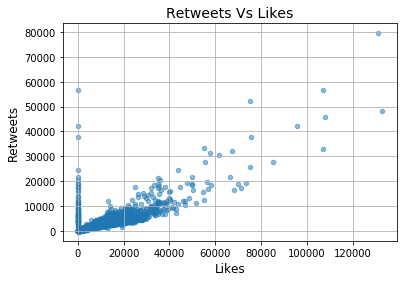

In [256]:
# Visualizing with a scatterplot

df.plot(kind='scatter', x='favorite_count', y='retweet_count', alpha = 0.5, )
plt.ylabel('Retweets', fontsize=12)
plt.xlabel('Likes', fontsize=12)
plt.title('Retweets Vs Likes', fontsize=14)
plt.grid()


# Saving image using savefig()
plt.savefig('Retweets_vs_Likes.png', bbox_inches='tight')               

**The above scatterplot clearly shows a STRONG POSITIVE correlation between Retweets and Likes**

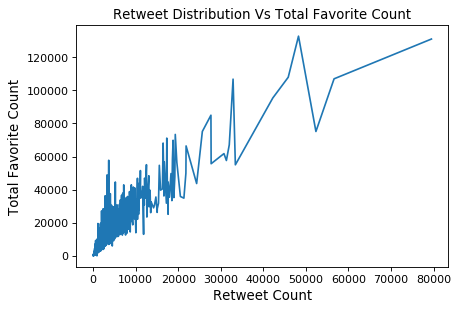

In [313]:
combined_tweets = df.groupby('retweet_count')['favorite_count'].sum()
plt.figure(dpi=80)

plt.xlabel('Retweet Count' , fontsize = 12)
plt.ylabel('Total Favorite Count', fontsize = 12)
plt.title('Retweet Distribution Vs Total Favorite Count')

# Plotting the dataframe
plt.plot(combined_tweets);

# To display the histogram
plt.show();

**This graph also shows a linear relationship between retweet count and total favorite tweet count. This shows that the more the tweet is retweeted, the more favourite it becomes**

## What are the top 5 most common dog names?

In [233]:
# Removing 'None' from our visualization because it's useless
masked_df = df[df['name']!= "None" ]

In [236]:
masked_df['name'].describe()

count        1396
unique        913
top       Charlie
freq           11
Name: name, dtype: object

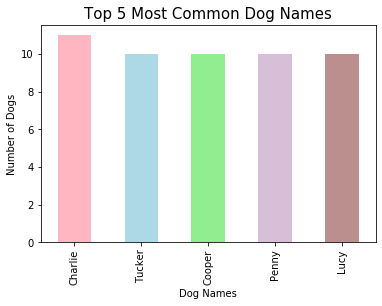

In [311]:
# Color scheme from here : https://matplotlib.org/3.1.0/gallery/color/named_colors.html

masked_df['name'].value_counts()[0:5].sort_values(ascending=False).plot(kind = 'bar', color=['lightpink', 'lightblue', 'lightgreen', 'thistle', 'rosybrown'])
plt.ylabel('Number of Dogs')
plt.title('Top 5 Most Common Dog Names', fontsize=15)
plt.xlabel('Dog Names')
plt.plot();

# Saving image using savefig()
plt.savefig('Top5_new.png', bbox_inches='tight')  

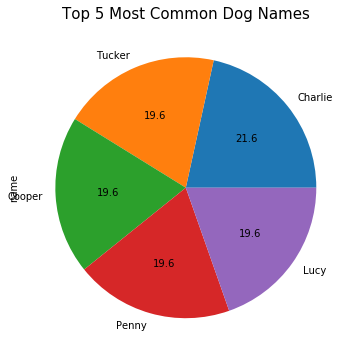

In [268]:
masked_df['name'].value_counts()[0:5].sort_values(ascending=False).plot(kind = 'pie', autopct="%.1f", figsize=(9,6) )
plt.title('Top 5 Most Common Dog Names', fontsize=15)
plt.plot();

# Saving image using savefig()
plt.savefig('top5.png', bbox_inches='tight')   

In [269]:
masked_df['name'].value_counts()

Charlie     11
Lucy        10
Penny       10
Cooper      10
Tucker      10
Oliver      10
Winston      8
Sadie        8
Lola         8
Bo           8
Toby         7
Daisy        7
Rusty        6
Stanley      6
Koda         6
Milo         6
Dave         6
Bella        6
Scout        6
Bailey       6
Jax          6
Oscar        5
Leo          5
Alfie        5
Larry        5
Chester      5
Buddy        5
Louis        5
Bear         4
Cassie       4
            ..
Kloey        1
Kallie       1
Clyde        1
Emma         1
Shooter      1
Chloe        1
Miley        1
Berkeley     1
Pancake      1
Stefan       1
Dobby        1
Meyer        1
Tyrus        1
Butters      1
Terrenth     1
Rupert       1
Ralf         1
Ronduh       1
Gunner       1
Zara         1
Lupe         1
Mimosa       1
Anakin       1
Samsom       1
Quinn        1
Molly        1
Beebop       1
River        1
Dixie        1
Brandy       1
Name: name, Length: 913, dtype: int64

In [302]:
masked_df['name'].nunique()

913

**From our visualization we see that *Charlie* is the most common dog name out of all dog names**

**Also, one important thing to note is that there are a total of 913 unique names of dogs in this dataset**

### Finding the Average Ratings given by @WeRateDogs

In [308]:
# Statistical Analysis
df['rating_ratio'].describe()

count    2073.000000
mean        1.169987
std         3.988880
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating_ratio, dtype: float64

In [309]:
df['rating_ratio'].mean()

1.169987031781531

**This means that roughly 11 and 12 are the most common ratings given by WeRateDogs**